In [225]:
# !pip install numpy

In [226]:
# !pip install pandas

In [227]:
import numpy as np
import pandas as pd
from PIL import Image

In [228]:
# !conda install -c anaconda xlrd --yes

In [229]:
df_can = pd.read_excel('Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)
print('data downloaded and read into a dataframe')

data downloaded and read into a dataframe


In [230]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [231]:
print(df_can.shape)

(195, 43)


In [232]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'],
    axis=1,
    inplace=True,
    )

df_can.rename(columns = {'OdName' : 'Country', 'AreaName': 'Continent', 'RegName': 'Region'},
    inplace=True
)

df_can.columns = list(map(str, df_can.columns))

df_can.set_index('Country', inplace=True)

df_can['Total'] = df_can.sum(axis=1)

years = list(map(str,range(1980, 2014)))

print('data dimensions: ', df_can.shape)

data dimensions:  (195, 38)


C:\Users\Fadli Putra\AppData\Local\Temp\ipykernel_14400\1841053876.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [233]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


# Visualizing data using Matplorlib

In [234]:
# !pip install -U matplotlib
# !pip conda install matplotlib

In [235]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.style.use('ggplot')

print(mpl.__version__)

3.7.0


# Waffle charts (optional)

In [236]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


step 1
membuat proporsi setiap kategori sehubungan dengan totalnya

In [237]:
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


step 2
menentukan ukuran keseluruhan dari waffle

In [238]:
width = 40
height = 10

total_num_tiles = width * height

print(total_num_tiles)

400


step 2
menggunakan proporsi setiap kategori untuk menentukan jumlah ubin masing masing kategori

In [239]:
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


step 4
membuat matriks yg menyerupai waffle dan mengisinya

In [240]:

waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        waffle_chart[row,col] = category_index
print("ok")

ok


In [241]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

step 5
petakan matriks wafle jadi visual

<Figure size 640x480 with 0 Axes>

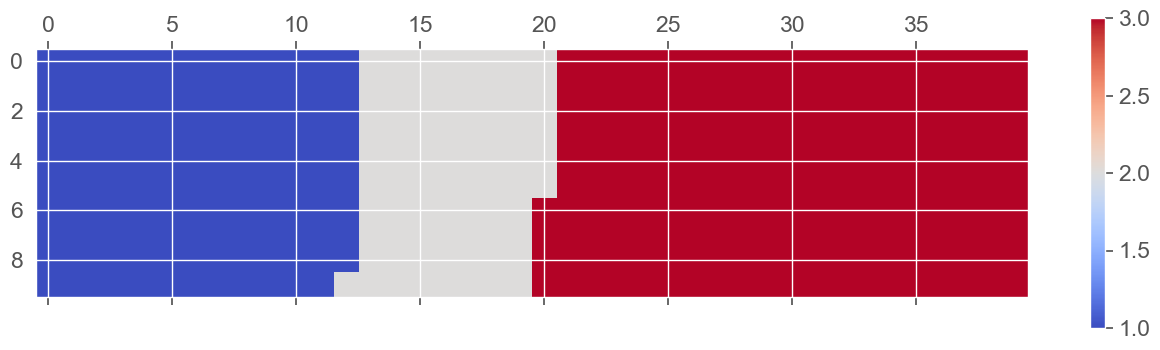

In [242]:
fig = plt.figure()

colormap = plt.cm.coolwarm

plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 640x480 with 0 Axes>

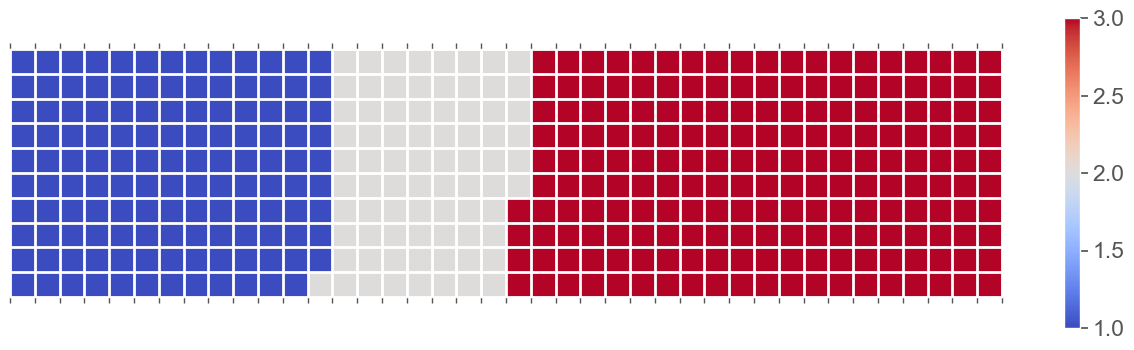

In [243]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', 
        color='w',
        linestyle='-',
        linewidth=2,
        )
plt.xticks([])
plt.yticks([])

<Figure size 640x480 with 0 Axes>

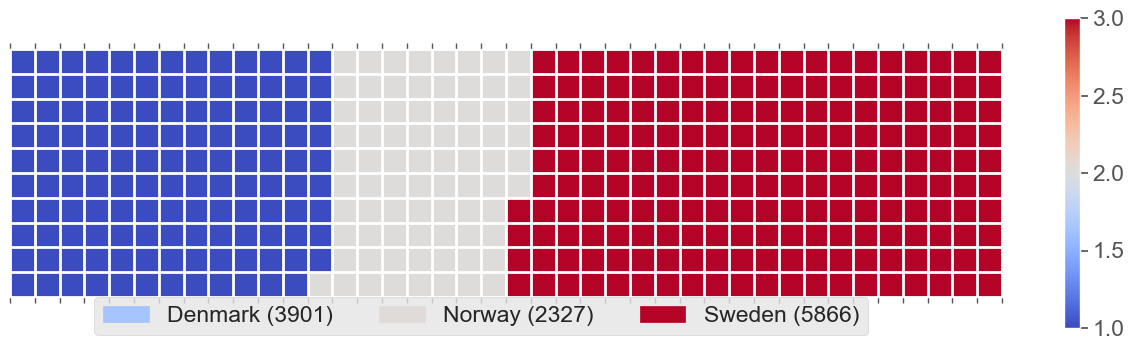

In [244]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', 
        color='w',
        linestyle='-',
        linewidth=2,
        )
plt.xticks([])
plt.yticks([])

# add legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn["Total"][i]) + ')'
    color_val = colormap(float(values_cumsum[i]/ total_values))
    legend_handles.append(mpatches.Patch(color=color_val, label = label_str))

plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0.,-0.2,0.95,.1))

# Word Clouds

In [245]:
# !pip install wordcloud

In [246]:
from wordcloud import WordCloud, STOPWORDS

print('wordcloud is installed')

wordcloud is installed


In [247]:
alice_novel = open('alice_novel.txt', 'r').read()


In [248]:
stopwords = set(STOPWORDS)

In [249]:
alice_wc = WordCloud(
    background_color='white', 
    max_words=1000,
    stopwords=stopwords
)
alice_wc.generate(alice_novel)

<function matplotlib.pyplot.show(close=None, block=None)>

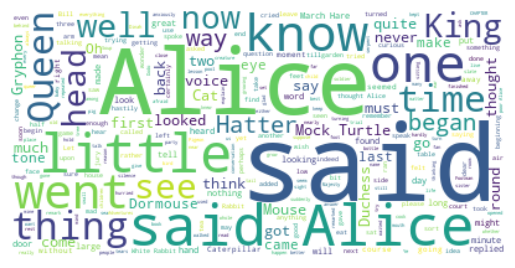

In [250]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show

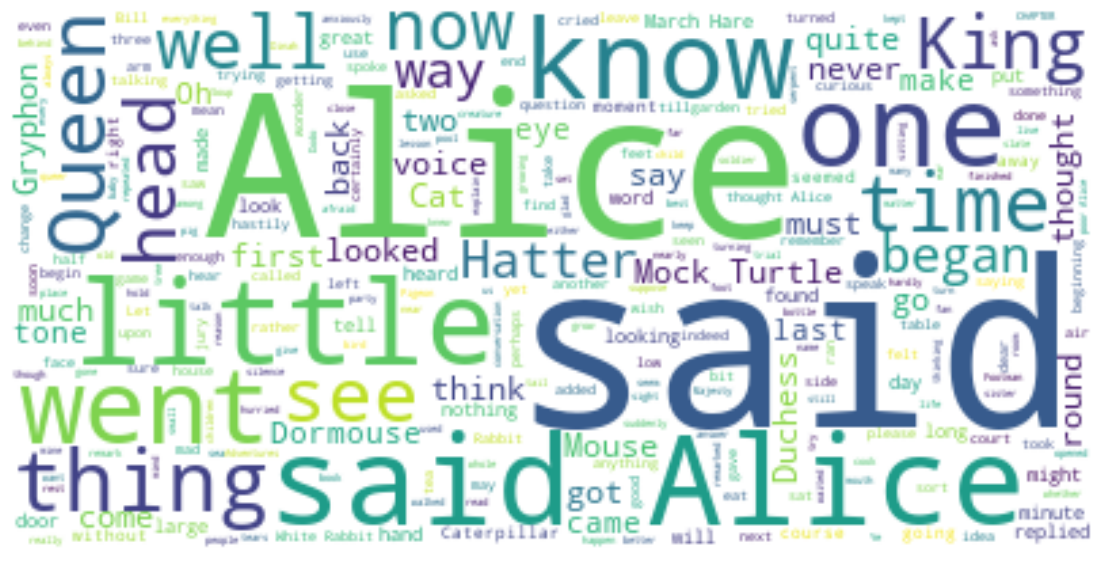

In [251]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

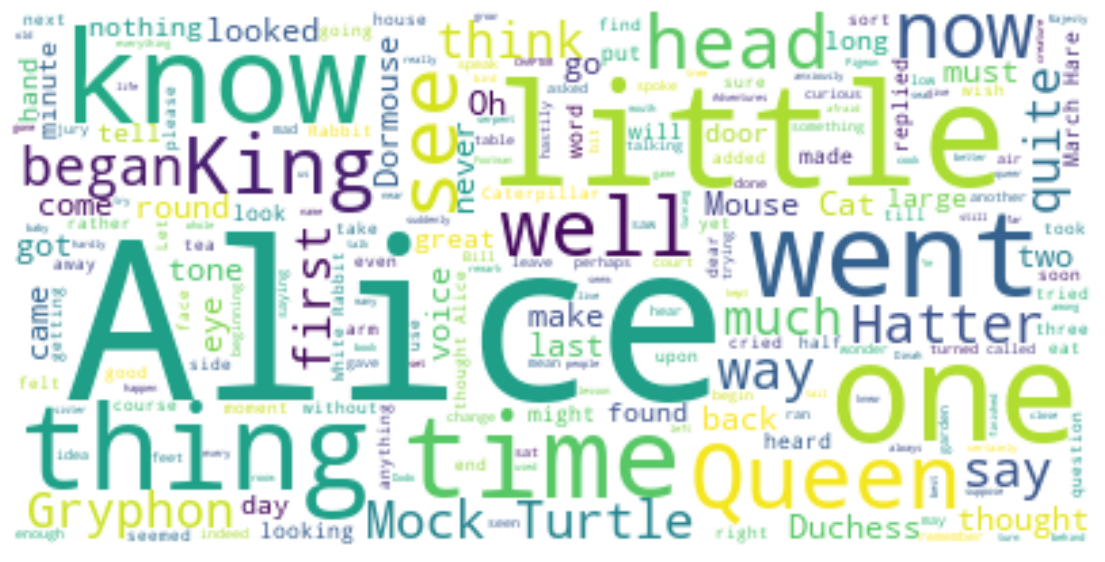

In [252]:
stopwords.add('said')
# menambahkan stopwords

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [253]:
alice_mask = np.array(Image.open('alice_mask.png'))
print('Image ready')

Image ready


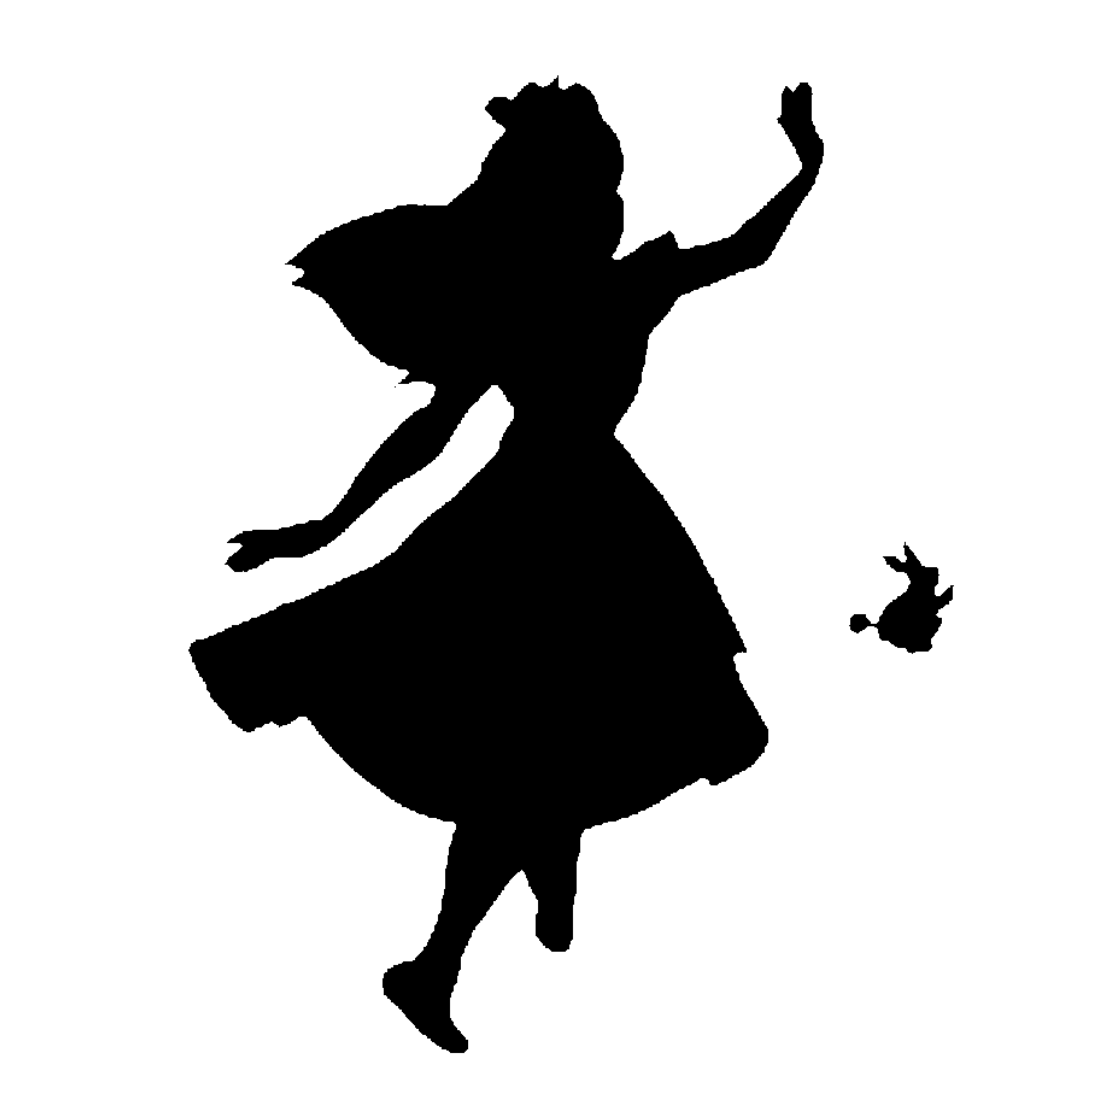

In [254]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

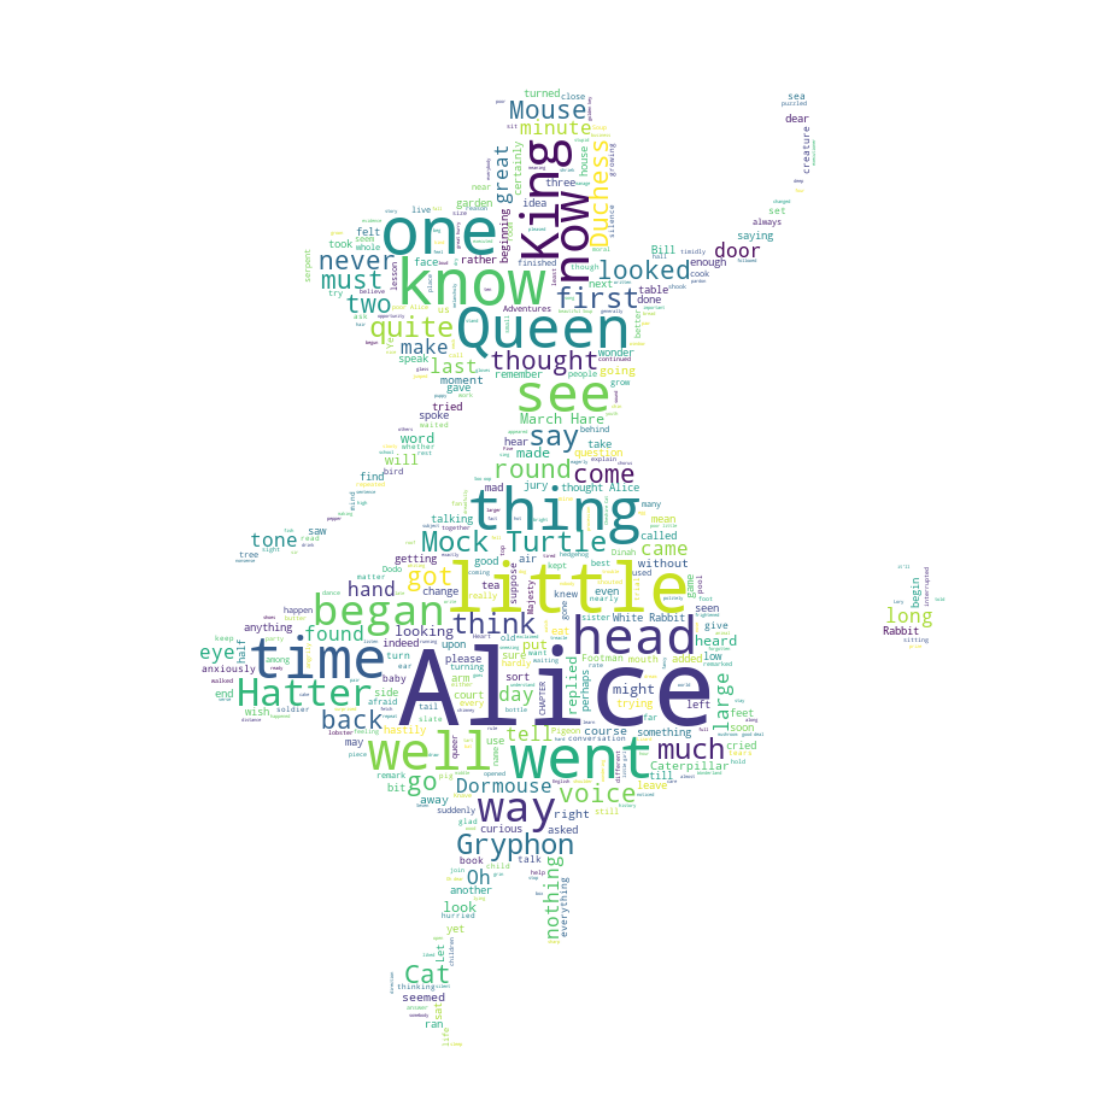

In [255]:
alice_wc = WordCloud(background_color='white',
                     max_words=2000,
                     mask=alice_mask,
                     stopwords=stopwords)
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [256]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Total Immigrasi dari 1980 - 2013

In [257]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Duplikat nama masing masing negara berdasarkan seberapa besar kontribusi mereka terhadap total imigrasi

In [258]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [259]:
wordcloud = WordCloud(background_color='white').generate(word_string)

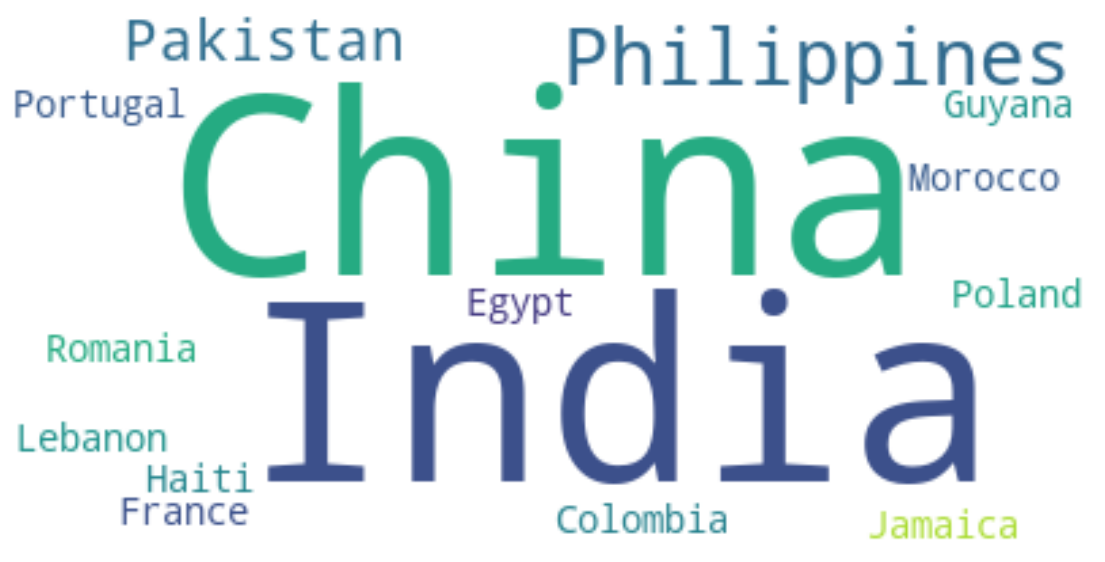

In [260]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plot

In [261]:
# !pip install seaborn

In [262]:
import seaborn as sns

print('seaborn ready')

seaborn ready


In [263]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map (float, df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


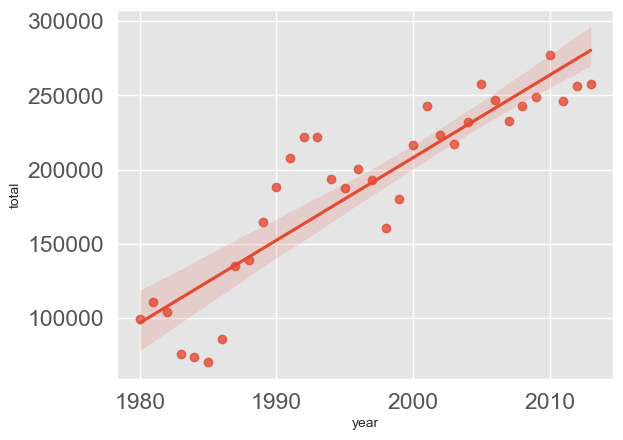

In [264]:
ax = sns.regplot(x ='year',
                 y='total',
                 data= df_tot)

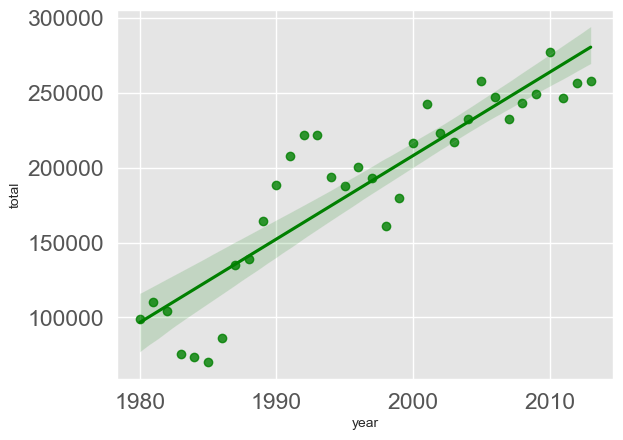

In [265]:
ax = sns.regplot(x ='year',
                 y='total',
                 data= df_tot,
                 color='green')

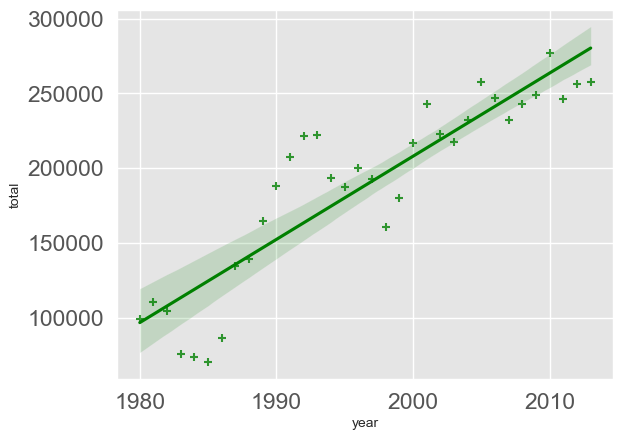

In [266]:
ax = sns.regplot(x ='year',
                 y='total',
                 data= df_tot,
                 color='green',
                 marker='+')

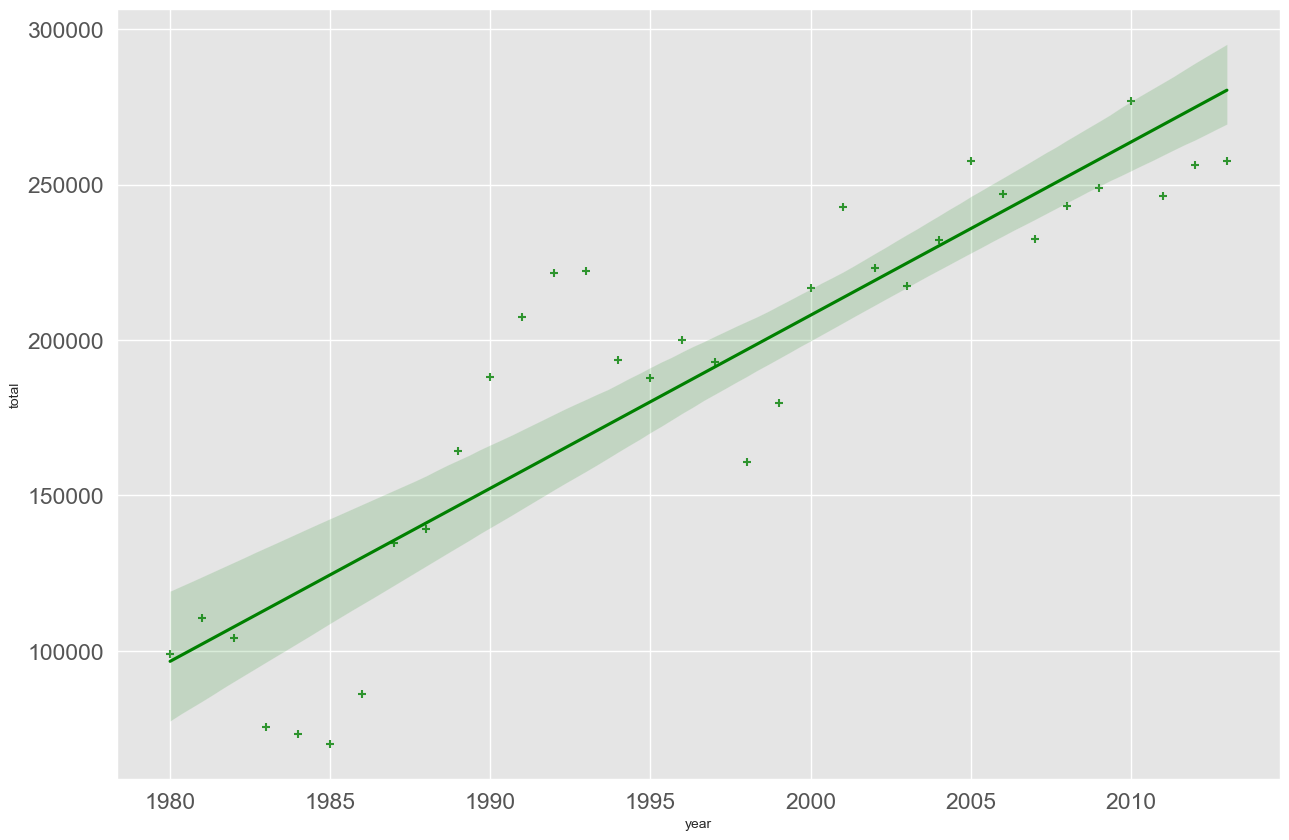

In [267]:
plt.figure(
    figsize=(15,10)
)

ax = sns.regplot(
   x= 'year',
    y='total',
    data=df_tot,
    color='green',
    marker='+'
)

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

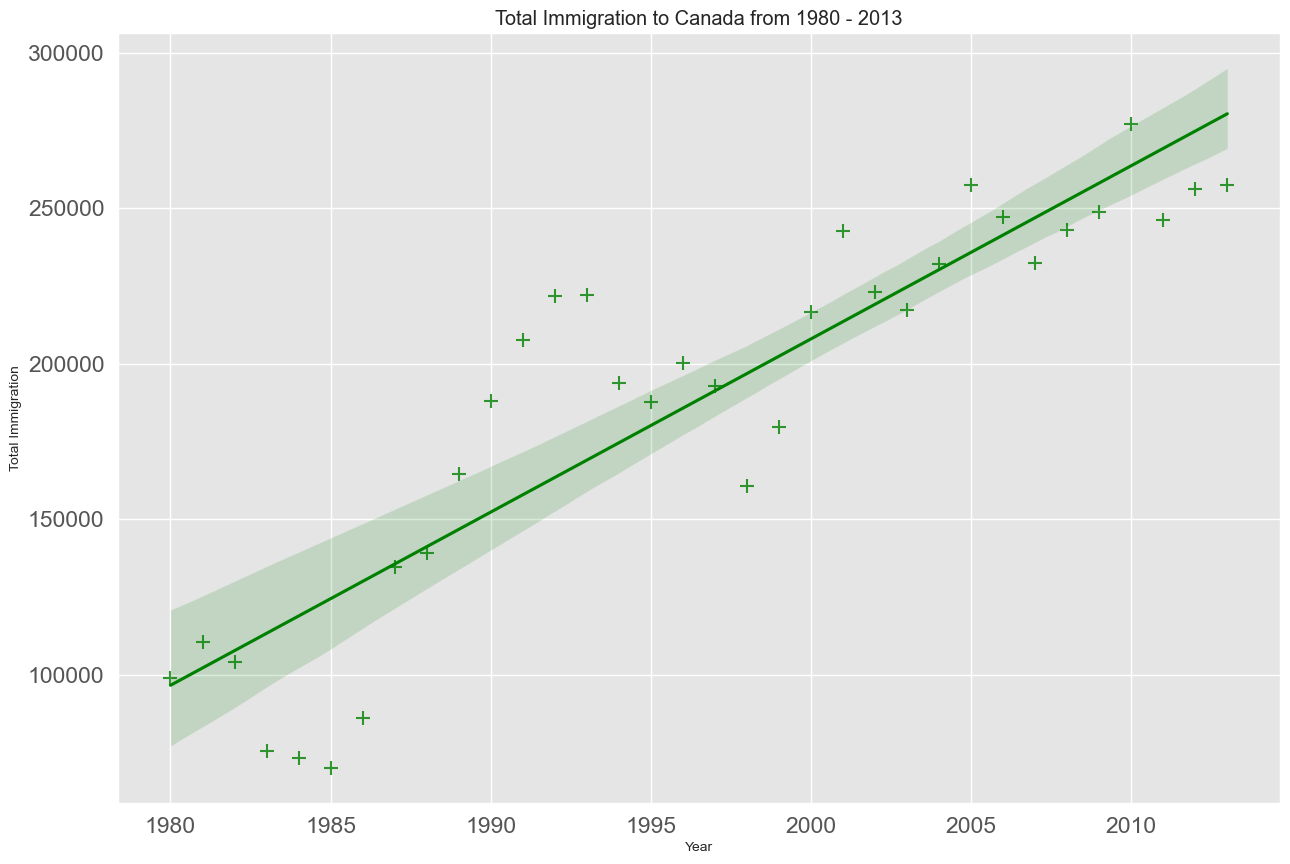

In [268]:
plt.figure(
    figsize=(15,10)
)

ax = sns.regplot(
   x= 'year',
    y='total',
    data=df_tot,
    color='green',
    marker='+',
    scatter_kws={'s':100}
)
ax.set(
    xlabel='Year',
    ylabel='Total Immigration'
)
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

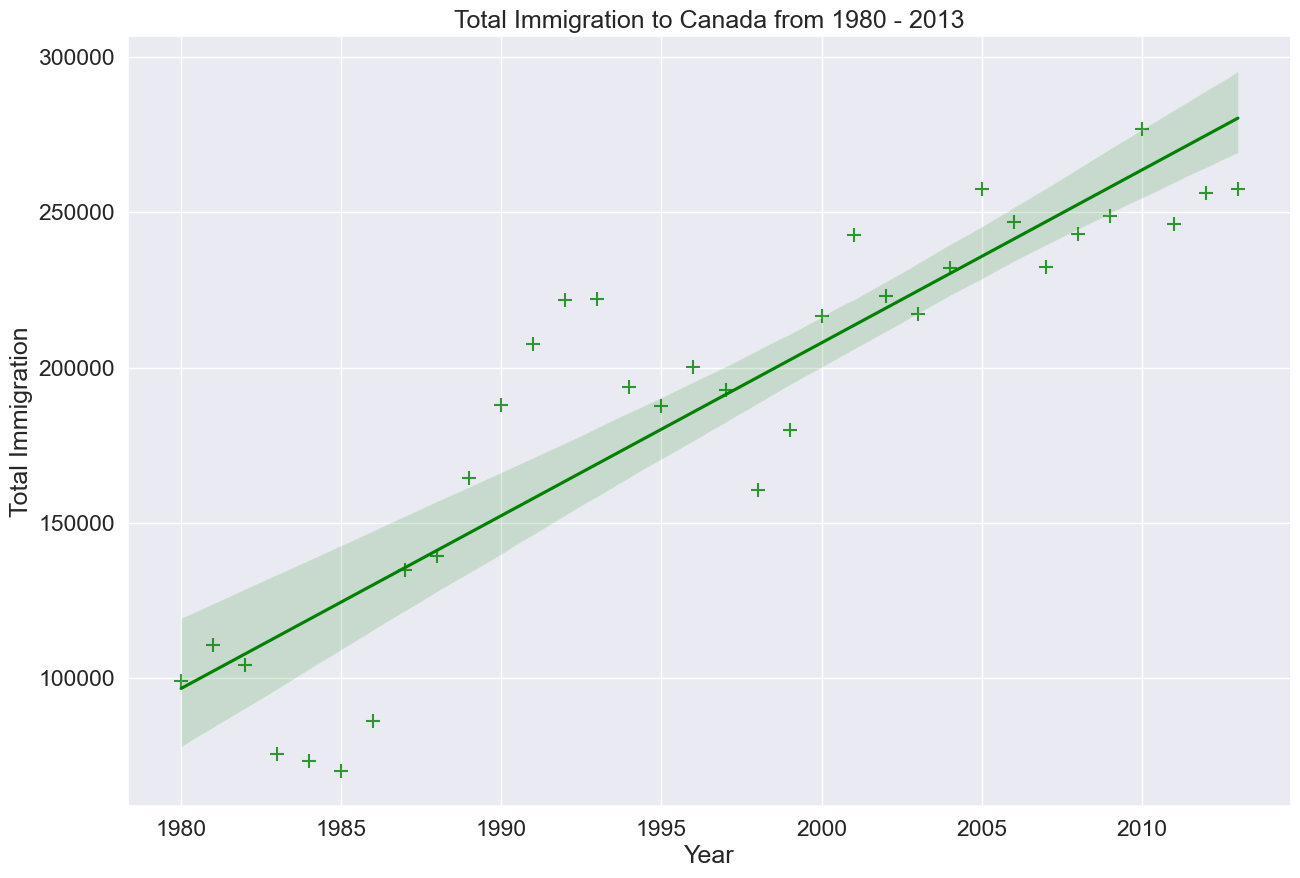

In [269]:
plt.figure(
    figsize=(15,10)
)
sns.set(font_scale=1.5)
ax = sns.regplot(
   x= 'year',
    y='total',
    data=df_tot,
    color='green',
    marker='+',
    scatter_kws={'s':100}
)
ax.set(
    xlabel='Year',
    ylabel='Total Immigration'
)
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

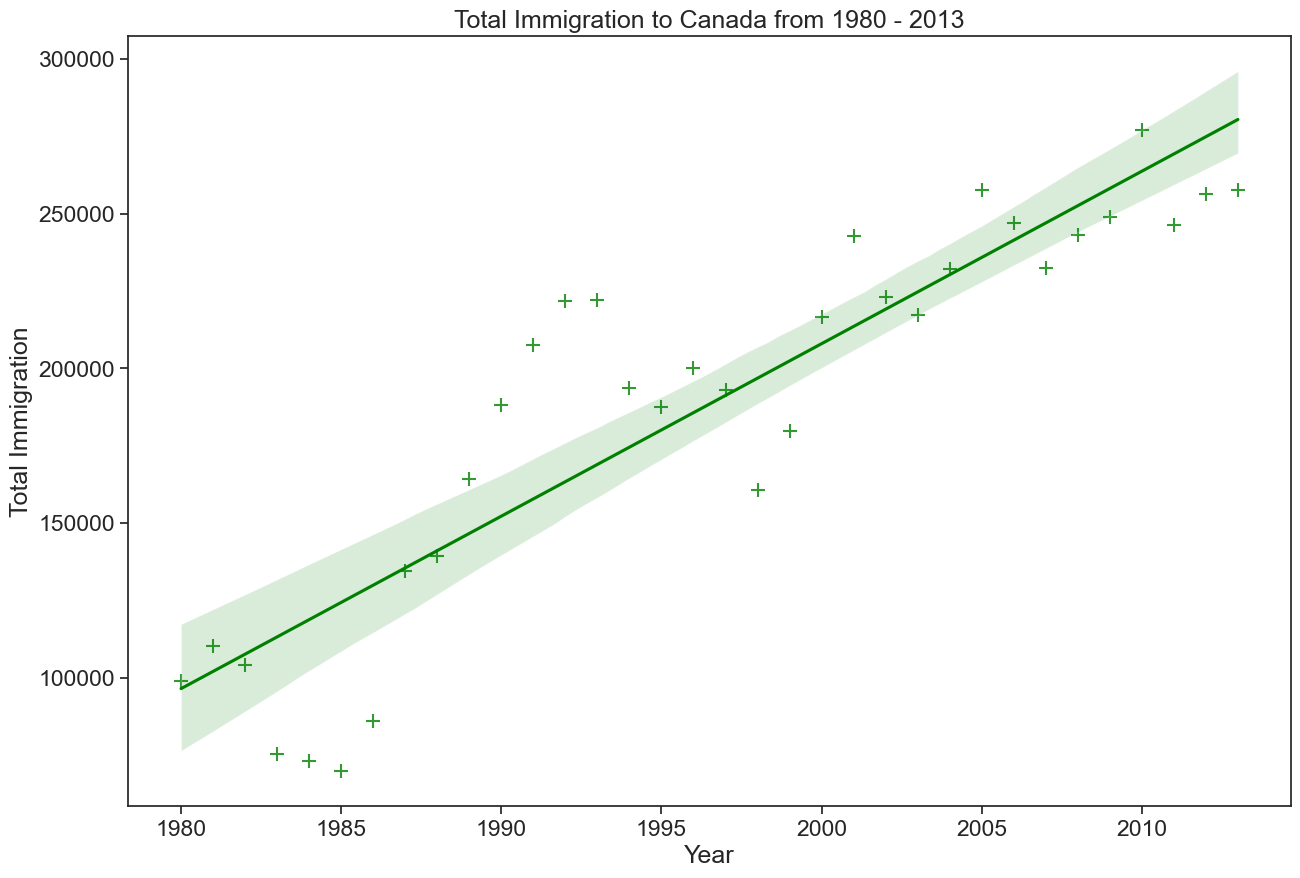

In [270]:
plt.figure(
    figsize=(15,10)
)
sns.set(font_scale=1.5)
sns.set_style('ticks')
ax = sns.regplot(
   x= 'year',
    y='total',
    data=df_tot,
    color='green',
    marker='+',
    scatter_kws={'s':100}
)
ax.set(
    xlabel='Year',
    ylabel='Total Immigration'
)
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

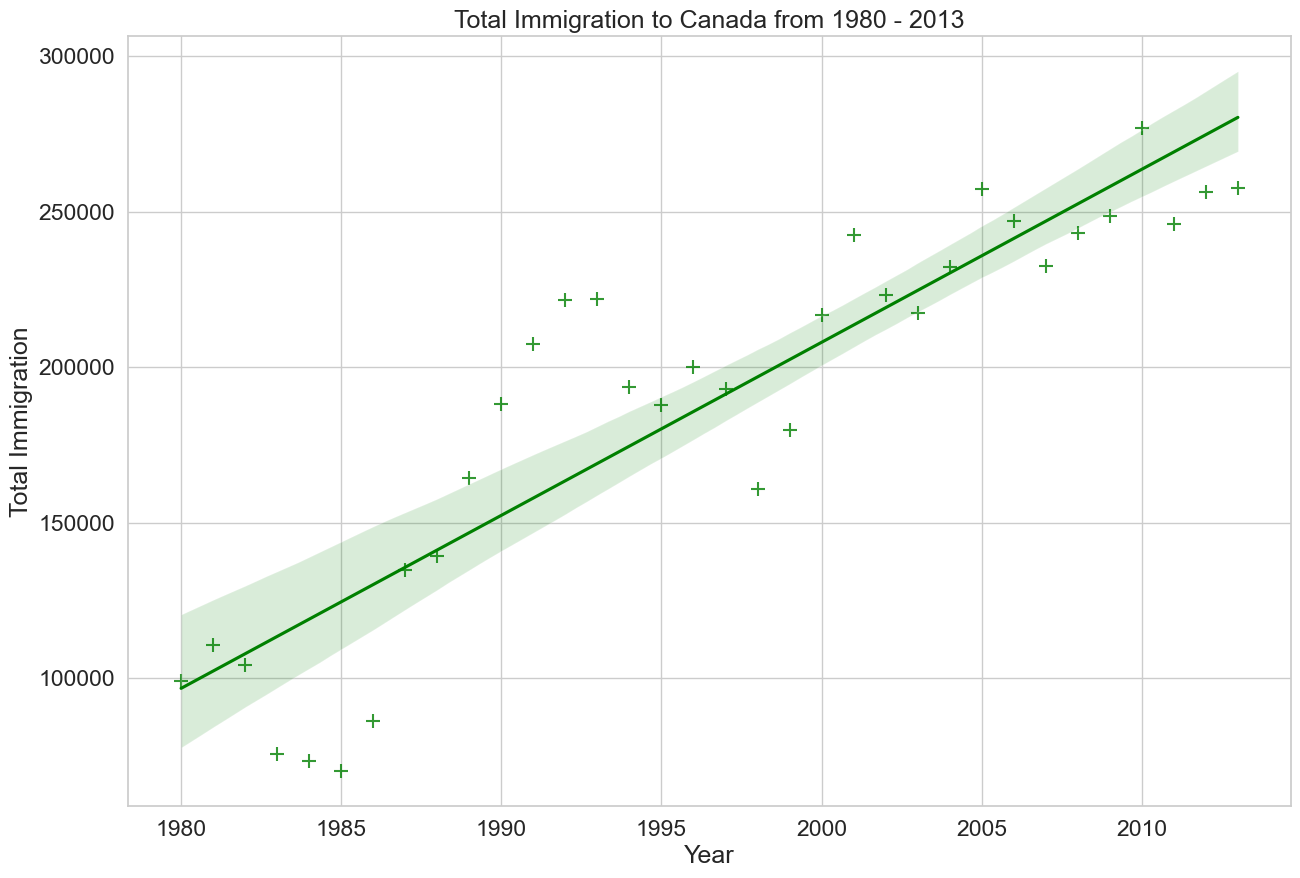

In [271]:
plt.figure(
    figsize=(15,10)
)
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(
   x= 'year',
    y='total',
    data=df_tot,
    color='green',
    marker='+',
    scatter_kws={'s':100}
)
ax.set(
    xlabel='Year',
    ylabel='Total Immigration'
)
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

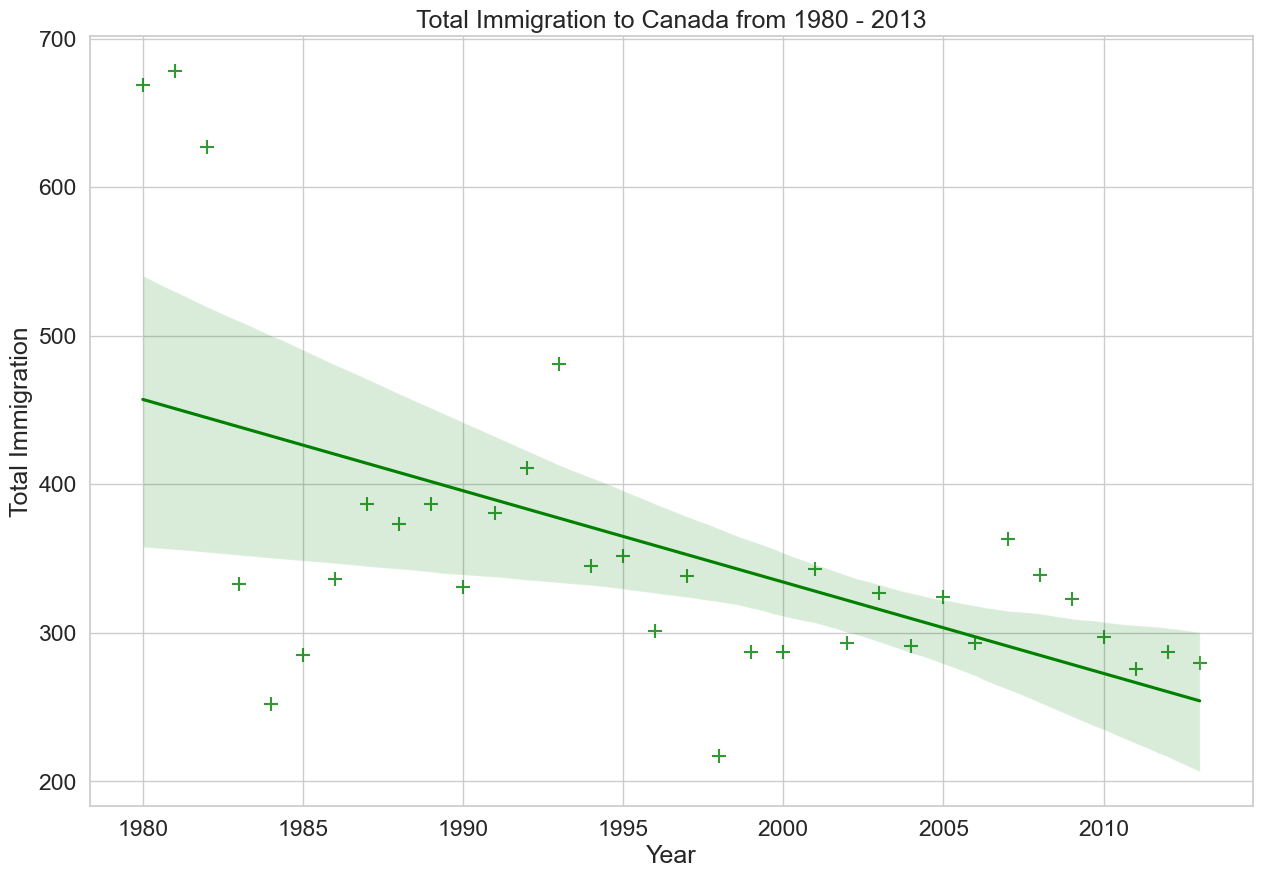

In [273]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'],years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
plt.figure(
    figsize=(15,10)
)
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(
   x= 'year',
    y='total',
    data=df_total,
    color='green',
    marker='+',
    scatter_kws={'s':100}
)
ax.set(
    xlabel='Year',
    ylabel='Total Immigration'
)
ax.set_title('Total Immigration to Canada from 1980 - 2013')